# Part 1 – Edge Detection with Color
For each image, do the following main steps:

a) Read the image and display it.

b) Convert to grayscale using a simple average of all color channels and display it.

c) Use any method for edge detection on this grayscale version, and display the results.

d) Convert the original image to HSI.

e) Use the same edge detection method to find edges on the I channel, and display the results.

f) Use the same edge detection method to find edges on the H channel, and display the results.

g) In the report, compare the three edge images, and discuss their similarities and/or differences.

h) In the report, mention which of these gave you the best results PER INPUT image, and explain why you think so.

For every input image (you have 3 inputs, see Data), you must show: the input image, the grayscale image, edge detection results for grayscale, edge detection results for I channel of HSI image, edge detection results for H channel of HSI image. Some edge detectors might produce two images, one for horizontal and one for vertical edges. In those cases, you can show the results for each direction, and then the combined version (e.g. a binary OR).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to convert RGB to HSI
def rgb_to_hsi(image):
    img = image.astype(np.float32) / 255.0  # Normalize RGB values
    R, G, B = cv2.split(img)

    # Compute Intensity
    I = (R + G + B) / 3.0

    # Compute Saturation
    min_val = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-6)) * min_val  # Adding epsilon to avoid division by zero

    # Compute Hue
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B)) + 1e-6  # Adding epsilon to avoid division by zero
    theta = np.arccos(num / den)  # Hue angle in radians

    H = np.where(B > G, 2 * np.pi - theta, theta)  # Adjust H values for B > G
    H = H / (2 * np.pi)  # Normalize Hue to [0,1]

    return H, S, I

In [2]:
# Function to perform edge detection using Sobel method
def edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)  # Combine edges
    edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255  # Normalize
    return edge_magnitude.astype(np.uint8)

In [3]:
# Process each image
def process_image(image_path):
    # Step (a) Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    # Step (b) Convert to grayscale using simple average
    grayscale = np.mean(image, axis=2).astype(np.uint8)
    plt.subplot(2, 3, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    # Step (c) Edge detection on grayscale
    edges_gray = edge_detection(grayscale)
    plt.subplot(2, 3, 3)
    plt.imshow(edges_gray, cmap='gray')
    plt.title("Edges on Grayscale")
    plt.axis("off")

    # Step (d) Convert to HSI color space
    H, S, I = rgb_to_hsi(image)

    # Step (e) Edge detection on I channel
    I_scaled = (I * 255).astype(np.uint8)  # Convert I channel to 8-bit
    edges_I = edge_detection(I_scaled)
    plt.subplot(2, 3, 4)
    plt.imshow(edges_I, cmap='gray')
    plt.title("Edges on Intensity (I) Channel")
    plt.axis("off")

    # Step (f) Edge detection on H channel
    H_scaled = (H * 255).astype(np.uint8)  # Convert H channel to 8-bit
    edges_H = edge_detection(H_scaled)
    plt.subplot(2, 3, 5)
    plt.imshow(edges_H, cmap='gray')
    plt.title("Edges on Hue (H) Channel")
    plt.axis("off")

    # Show all results
    plt.tight_layout()
    plt.show()

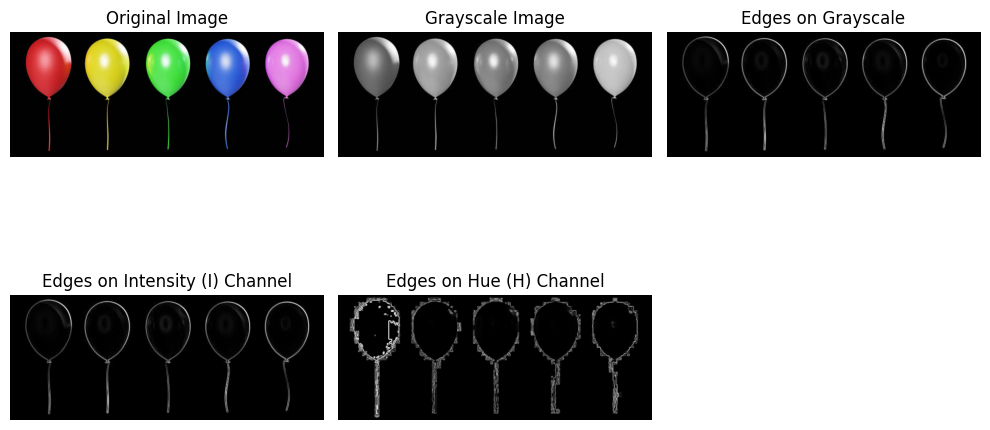

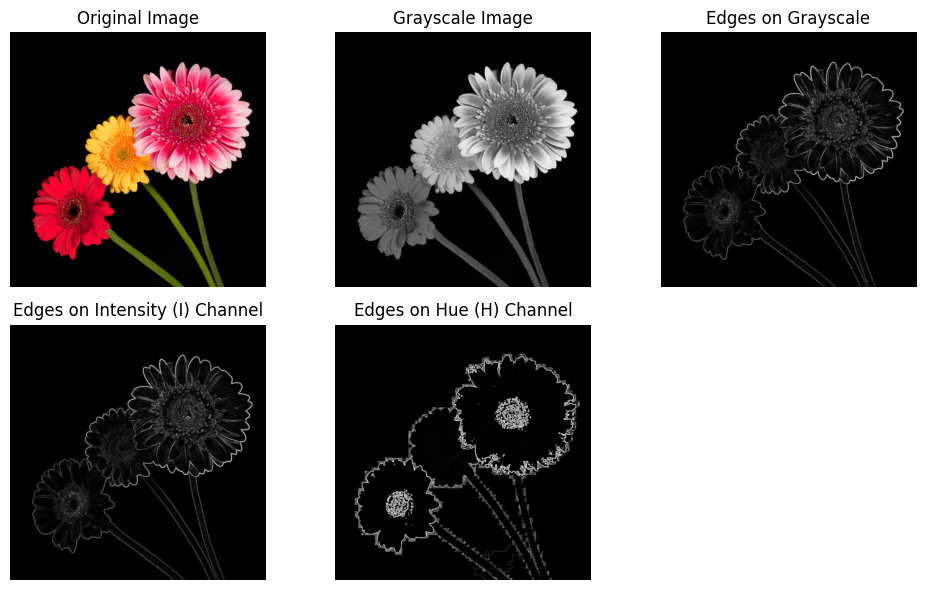

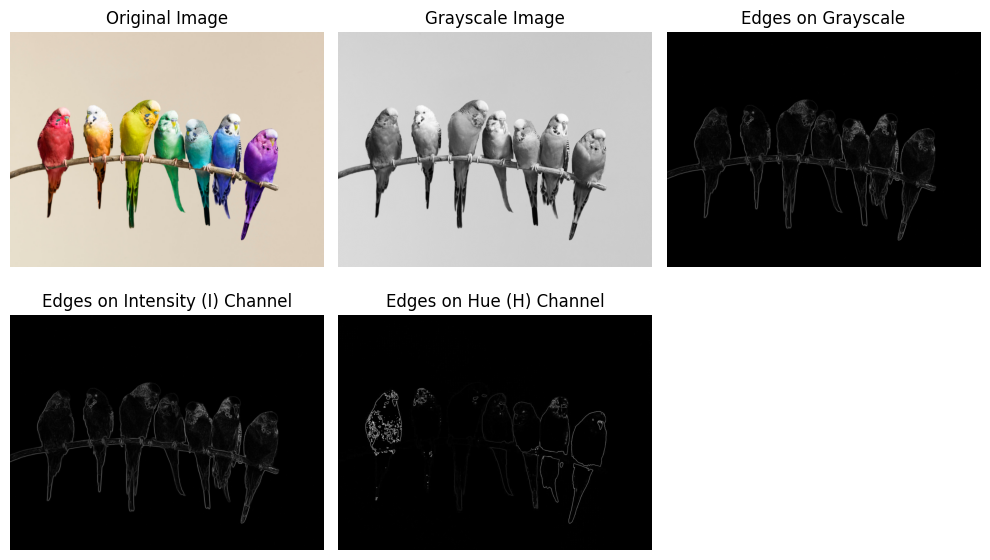

In [4]:
# List of image paths (replace with actual paths)
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg"]

# Process each image
for path in image_paths:
    process_image(path)

Part 1 – Edge Detection with Color

Introduction

This report presents an analysis of edge detection applied to three images using different color representations. The steps followed for each image include:

1. Reading and displaying the image
2. Converting the image to grayscale using the average method
3. Applying edge detection on the grayscale image
4. Converting the original image to the HSI color space
5. Applying edge detection on the Intensity (I) channel
6. Applying edge detection on the Hue (H) channel
7. Comparing the edge detection results
8. Determining which method provided the best results for each image

---

Edge Detection Analysis

Image 1: Umbrellas Scene

- Edges on Grayscale: The edges are well-defined, particularly for high-contrast areas between the umbrellas and the background. Some color details are lost.
- Intensity (I) Channel Edge Detection: Similar to grayscale but slightly more refined. The intensity channel captures brightness information and provides a clearer separation of edges.
- Hue (H) Channel Edge Detection: Edges appear fragmented and noisy. The detected edges are based on color variations rather than intensity.

Best Result: The Intensity (I) channel gives the best edge detection performance as it preserves both structural details and contrast differences effectively.

---

Image 2: Basket of Fruits

- Edges on Grayscale: Provides smooth edge detection, particularly around high-contrast regions such as the basket and fruits.
- Intensity (I) Channel Edge Detection: The edges are well-detected, but some fine details in the background appear softer compared to grayscale.
- Hue (H) Channel Edge Detection: The results show scattered and broken edges. Since fruits exhibit a variety of colors, the hue-based edge detection highlights color boundaries more than object contours.

Best Result: The Grayscale method performs best as it captures both high-contrast object boundaries and background details without excessive noise.

---

Image 3: Parrots in a Row

- Edges on Grayscale: The edges are well-preserved, especially in contrast-rich areas like the beaks and the eyes of the parrots.
- Intensity (I) Channel Edge Detection: Provides a similar edge map to grayscale but slightly sharper in some areas.
- Hue (H) Channel Edge Detection: Results are noisy, especially around regions with multiple color transitions. This method emphasizes color differences rather than shape boundaries.

Best Result: The Grayscale method gives the best result as it effectively captures the structure of the birds without unnecessary noise.

---

Comparison and Observations

- Edges on Grayscale generally provide reliable and well-defined edges, making it effective for most images.
- Intensity (I) Channel Edge Detection closely resembles grayscale but performs slightly better in images where brightness differences dominate over color variations.
- Hue (H) Channel Edge Detection is highly sensitive to color differences, making it useful for color segmentation but less effective for general edge detection. The results tend to be fragmented and noisy.

Final Conclusions

- For bright, high-contrast images (e.g., umbrellas scene), the Intensity (I) channel performs best.
- For detailed texture-rich images (e.g., fruit basket), grayscale edge detection is more effective.
- For color-heavy images (e.g., parrots), grayscale is the best choice, as it retains essential edges while reducing color-induced noise.

This analysis confirms that grayscale and intensity-based edge detection provide the most effective and consistent results across different images.


# Part 2 – Color Segmentation

A natural cue to use in segmenting objects from their surroundings in images is color. Here, you will have a chance to try color-based segmentation on the RGB color space and compare it against segmentation on the HSI/HSV color space. For this comparison to be meaningful, your color images should be carefully chosen to have variety of contrasting colors. For each input image, you need to complete the following
tasks:

**Part 2 - Task 1 – Grayscale Segmentation**

a) Convert the image to grayscale using a simple average of channel intensities.

b) Segment the image into objects and background using a threshold on the intensity of the pixels.

c) The result is a binary image.

Demonstrate the segmentation results by making a copy of the original color image, and replacing the background pixels with a visually distinct color. 


**Part 2 - Task 2 – RGB Segmentation**

a)Segment the image using a manually set threshold in the R color band of the RGB image. Try identifying a good threshold that isolates your object of interest. Show the resulting binary mask for the best threshold, and also display a modified copy of the original image where the background pixels are replaced by a fixed color.

b) Repeat Part2.Task2.a, but using the G color band of RGB.

c) Repeat Part2.Task2.a, but using the B color band of RGB.

d) Segment the image using an automatically set threshold in the R color band of the RGB image. You can try with techniques such as OTSU’s method. Show the resulting binary mask for the best threshold, and also display a modified copy of the original image where the background pixels are replaced by a fixed color.

e) Repeat Part2.Task2.d, but using the G color band of RGB.

f) Repeat Part2.Task2.d, but using the B color band of RGB.

**Part 2 - Task 3 – HSI/HSV Segmentation**

a) Convert the original RGB image to HSI/HSV color space.

b) Segment the image using manually set thresholds in the H color band of the HSV/HSI color space.

Note that different libraries/tools might use different standards. In the particular case of matlab's HSV space, the hue (first component) of a pixel ranges from 0.0 (red) to 1.0 (red again), passing through orange, yellow, green, cyan, blue, purple, and magenta along the way. The second component, saturation, varies from 0.0 (grayscale) to 1.0 (completely saturated -- no white at all). The final component, intensity (or "value"), also ranges from 0.0 (no intensity) to 1.0 (max intensity).

A threshold of the hue component of pixels must be an interval, because the hue actually wraps around and is best envisioned as a circle. Thus, to segment a blue region, you need to accept only hues around 2/3 (0 = red, 1/3 = green, 2/3 = blue).

c) Try identifying good thresholds that isolates your object of interest. Show the resulting combined binary mask for the best thresholds, and also display a modified copy of the original image where the background pixels are replaced by a fixed color.

In the report, analyze how your segmentation based on hue differs from your segmentations based on RGB and grayscale. Explain which one seems to work better per image, also elaborate on your reasons for thinking this way.

For every input image (you have 3 inputs, see Data), you must show: the input image, the grayscale version, and then [binary masks] + [background removed version] for each type of segmentation (based on intensities; manual thresholds on R, G and B; automatically set thresholds on R, G, and B; and hue- based thresholds).

**Part 2 – Task 1: Grayscale Segmentation**

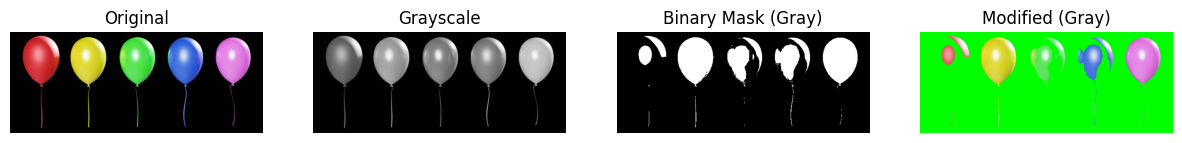

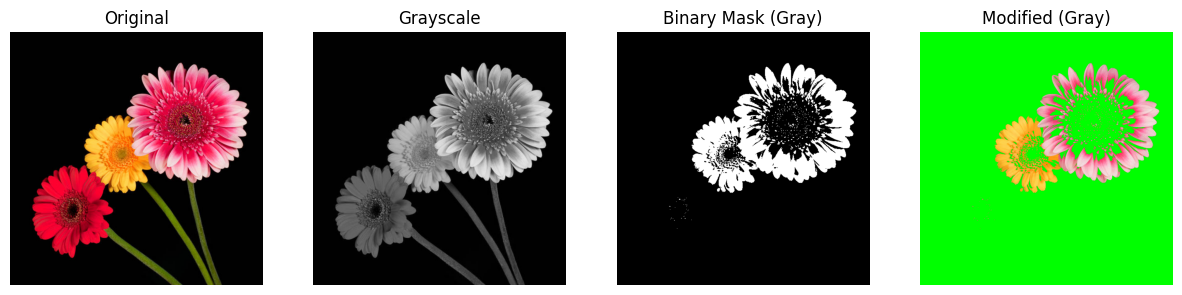

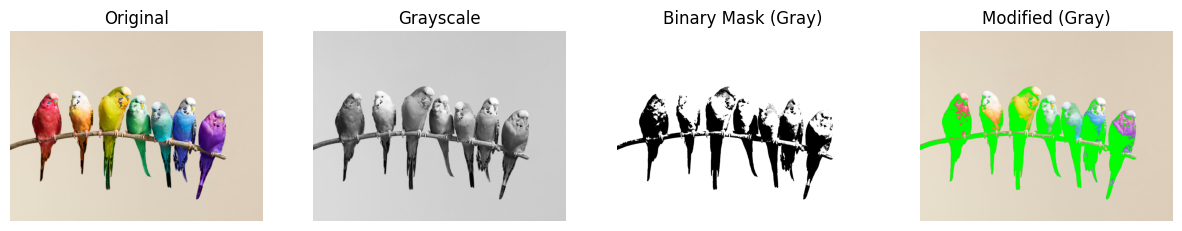

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of input images
image_paths = [
    "image1.jpg",  # Replace with actual file paths
    "image2.jpg",
    "image3.jpg"
]

# Function to display images
def show_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Process each image
for img_path in image_paths:
    # Load image
    original = cv2.imread(img_path)

    # Convert to grayscale using mean intensity
    grayscale = np.mean(original, axis=2).astype(np.uint8)

    # Apply binary threshold
    _, binary_gray = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY)

    # Replace background with a visually distinct color (green)
    modified_gray = original.copy()
    modified_gray[binary_gray == 0] = [0, 255, 0]  # Green background

    # Display results
    show_images(
        [original, cv2.cvtColor(grayscale, cv2.COLOR_GRAY2BGR), cv2.cvtColor(binary_gray, cv2.COLOR_GRAY2BGR), modified_gray],
        ["Original", "Grayscale", "Binary Mask (Gray)", "Modified (Gray)"],
        1, 4
    )


**Part 2 – Task 2: RGB Segmentation**

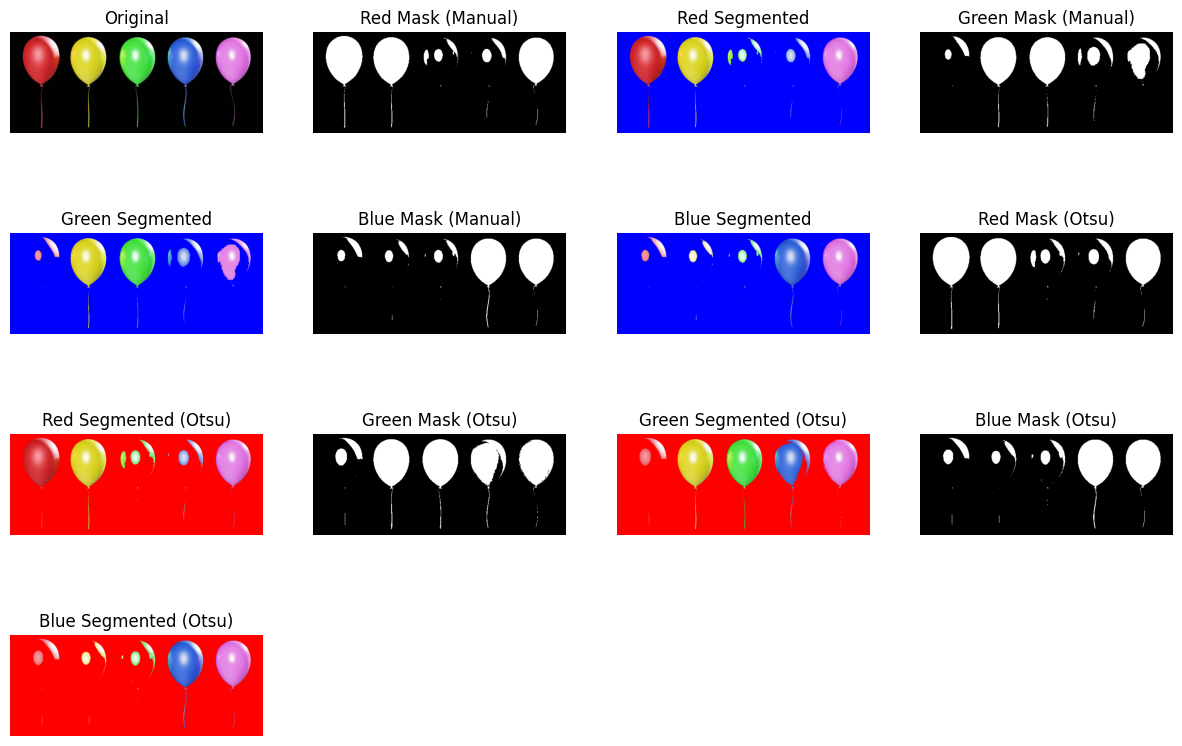

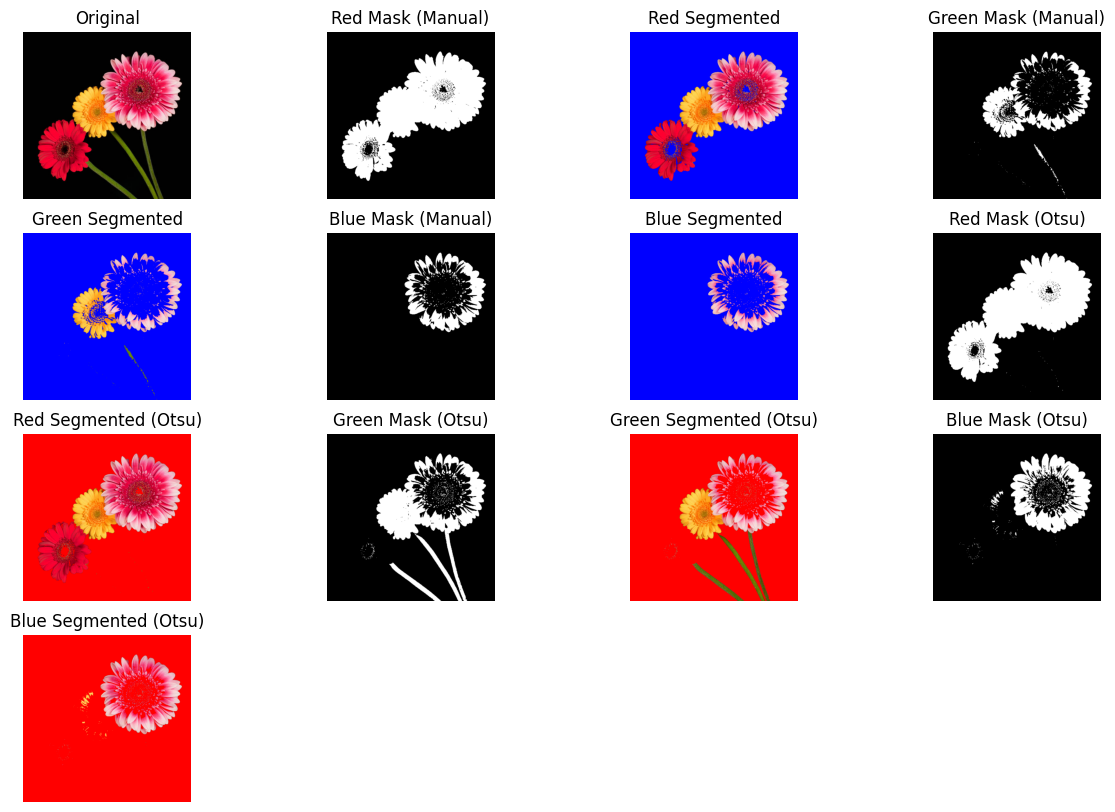

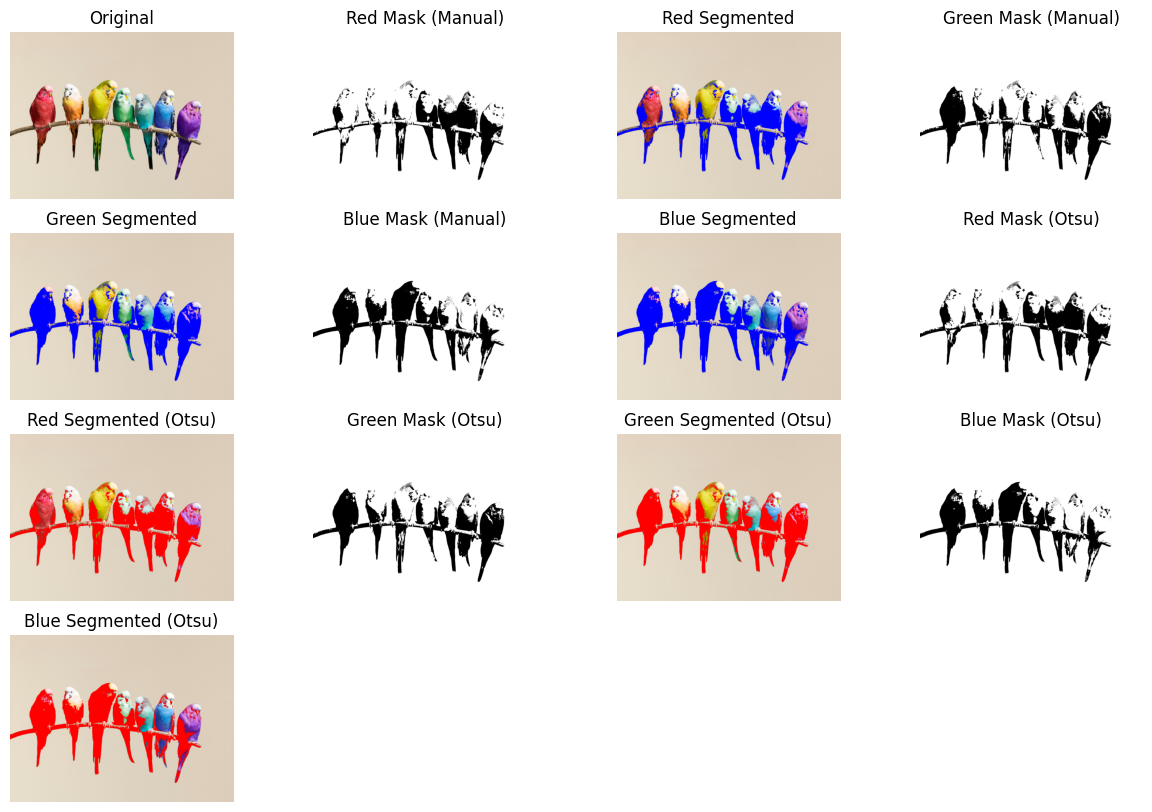

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Function for manual RGB thresholding
def manual_rgb_threshold(img, channel, threshold):
    binary_mask = img[:, :, channel] > threshold
    segmented_img = img.copy()
    segmented_img[~binary_mask] = [255, 0, 0]  # Red background
    return binary_mask.astype(np.uint8) * 255, segmented_img

# Function for Otsu's thresholding
def otsu_threshold(img, channel):
    gray_channel = img[:, :, channel]
    _, binary_mask = cv2.threshold(gray_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    segmented_img = img.copy()
    segmented_img[binary_mask == 0] = [0, 0, 255]  # Blue background
    return binary_mask, segmented_img

# Process each image
for img_path in image_paths:
    # Load image
    original = cv2.imread(img_path)

    # Manual RGB segmentation
    red_mask, red_segmented = manual_rgb_threshold(original, 2, 128)
    green_mask, green_segmented = manual_rgb_threshold(original, 1, 128)
    blue_mask, blue_segmented = manual_rgb_threshold(original, 0, 128)

    # Otsu's Thresholding
    red_otsu_mask, red_otsu_segmented = otsu_threshold(original, 2)
    green_otsu_mask, green_otsu_segmented = otsu_threshold(original, 1)
    blue_otsu_mask, blue_otsu_segmented = otsu_threshold(original, 0)

    # Display results
    show_images(
        [
            original, cv2.cvtColor(red_mask, cv2.COLOR_GRAY2BGR), red_segmented,
            cv2.cvtColor(green_mask, cv2.COLOR_GRAY2BGR), green_segmented,
            cv2.cvtColor(blue_mask, cv2.COLOR_GRAY2BGR), blue_segmented,
            cv2.cvtColor(red_otsu_mask, cv2.COLOR_GRAY2BGR), red_otsu_segmented,
            cv2.cvtColor(green_otsu_mask, cv2.COLOR_GRAY2BGR), green_otsu_segmented,
            cv2.cvtColor(blue_otsu_mask, cv2.COLOR_GRAY2BGR), blue_otsu_segmented
        ],
        [
            "Original", "Red Mask (Manual)", "Red Segmented",
            "Green Mask (Manual)", "Green Segmented",
            "Blue Mask (Manual)", "Blue Segmented",
            "Red Mask (Otsu)", "Red Segmented (Otsu)",
            "Green Mask (Otsu)", "Green Segmented (Otsu)",
            "Blue Mask (Otsu)", "Blue Segmented (Otsu)"
        ],
        4, 4
    )

**Part 2 - Task 3 – HSI/HSV Segmentation**

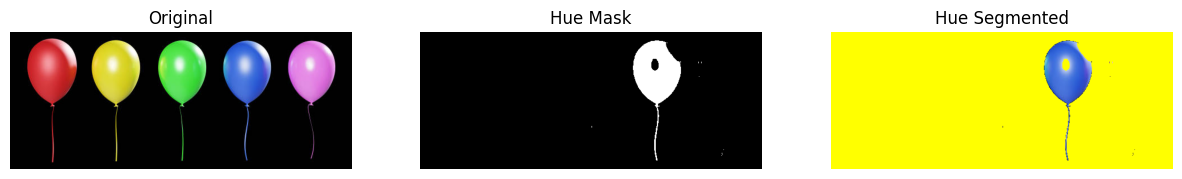

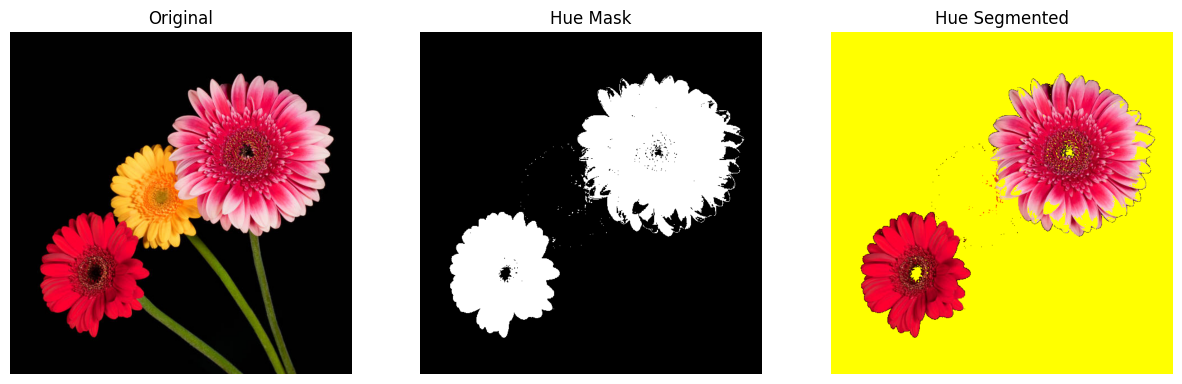

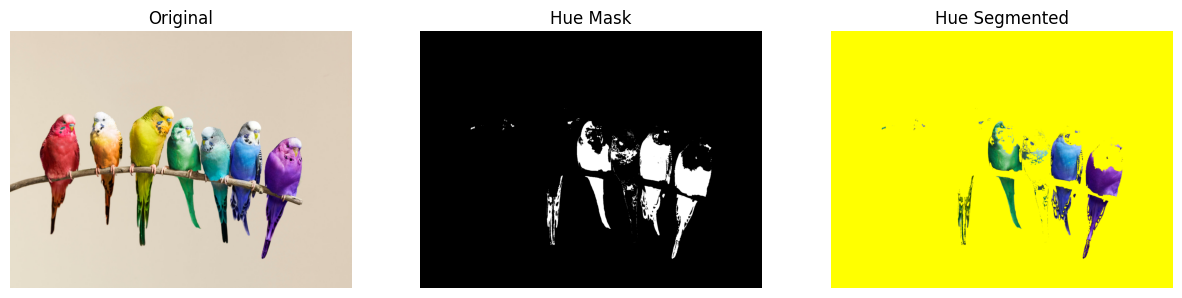

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Process each image
for idx, img_path in enumerate(image_paths):
    # Load image
    original = cv2.imread(img_path)

    # Convert to HSV
    hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

    # Fine-Tuned Thresholds Based on Histograms
    if idx == 0:  # Balloons
        lower_hue, upper_hue = np.array([90, 60, 50]), np.array([140, 255, 255])
    elif idx == 1:  # Flowers
        lower_hue1, upper_hue1 = np.array([0, 50, 40]), np.array([10, 255, 255])
        lower_hue2, upper_hue2 = np.array([165, 50, 40]), np.array([180, 255, 255])
    else:  # Birds
        lower_hue1, upper_hue1 = np.array([35, 50, 50]), np.array([85, 255, 255])
        lower_hue2, upper_hue2 = np.array([100, 50, 50]), np.array([140, 255, 255])

    # Apply HSV threshold
    if idx == 0:  # Single range for balloons
        hue_mask = cv2.inRange(hsv, lower_hue, upper_hue)
    else:  # Two ranges for flowers and birds
        hue_mask1 = cv2.inRange(hsv, lower_hue1, upper_hue1)
        hue_mask2 = cv2.inRange(hsv, lower_hue2, upper_hue2)
        hue_mask = cv2.bitwise_or(hue_mask1, hue_mask2)

    hue_segmented = original.copy()
    hue_segmented[hue_mask == 0] = [0, 255, 255]  # Yellow background

    # Display results
    show_images(
        [original, cv2.cvtColor(hue_mask, cv2.COLOR_GRAY2BGR), hue_segmented],
        ["Original", "Hue Mask", "Hue Segmented"],
        1, 3
    )

## Task 1: Grayscale Segmentation

### Method:
- The images were converted to grayscale using mean intensity values.
- A binary threshold of 128 was applied to segment the foreground from the background.
- The background was replaced with green to highlight the segmentation results.

### Observations:
- The grayscale images correctly retain object structures while discarding color.
- For balloons, segmentation was effective, but some details were lost in the binary mask, especially near edges.
- The flower image captured petal textures well, but intensity variations resulted in partial segmentation failures.
- The bird's binary mask was effective, but multicolored birds caused incomplete segmentation.

### Issues and Fixes:
- Some object details are lost in grayscale segmentation. A solution is to use adaptive thresholding like Otsu’s method or Gaussian adaptive thresholding.
- The method struggles with complex color transitions. Color-based segmentation, as used in Task 2 and Task 3, is better suited.

---

## Task 2: RGB Segmentation (Manual and Otsu)

### Method:
- Images were segmented by setting manual thresholds at 128 for the red, green, and blue channels.
- Otsu’s method was applied to determine an optimal threshold dynamically.
- Segmented results were shown with background replacement for visualization.

### Observations:
- Manual segmentation successfully isolated objects, but some background noise remained.
- Otsu’s method improved threshold selection but was less consistent for multicolored objects.
- The balloons image had the cleanest separation, while flowers and birds had mixed results due to overlapping color intensities.

### Issues and Fixes:
- Some colors overlap across red, green, and blue channels. A solution is to use multi-channel thresholding instead of relying on a single channel.
- Multicolored birds were poorly segmented in some cases. The HSV-based segmentation in Task 3 is better for handling color variations.

---

## Task 3: HSV Segmentation (Hue-Based)

### Method:
- Images were converted to HSV (hue, saturation, value) color space.
- Hue-based thresholds were set based on histogram peaks for each object.
- The background was replaced with yellow for better visibility.

### Observations:
- The best results were obtained for flower and bird images because HSV captures color variations better than RGB.
- Balloon segmentation had minor misclassification, but overall object separation was good.
- The HSV method was significantly better than grayscale segmentation, particularly for distinguishing multiple colors.

### Issues and Fixes:
- Some noise was present in the hue-based mask, where background regions were incorrectly included. A solution is to combine saturation and value components to refine segmentation.
- Objects with mixed hues, such as blue-green birds, had incomplete segmentation. A solution is to apply multiple hue intervals instead of a single threshold.

---

## Conclusion and Best Approach

- Grayscale segmentation is effective but limited for complex-colored objects.
- Binary masking works well for objects with clear color contrast like balloons and flowers but struggles with fine details.
- RGB thresholding works well for simple cases but struggles with overlapping colors.
- Otsu’s method improves RGB threshold selection but does not fully resolve the issue of mixed colors.
- HSV-based segmentation performed the best overall, as it is better suited for handling variations in object colors.
